In [78]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D,Bidirectional,Dense, Input, LSTM, Embedding, Dropout, Activation, GRU,Conv1D,MaxPooling1D,Conv2D
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import os
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt

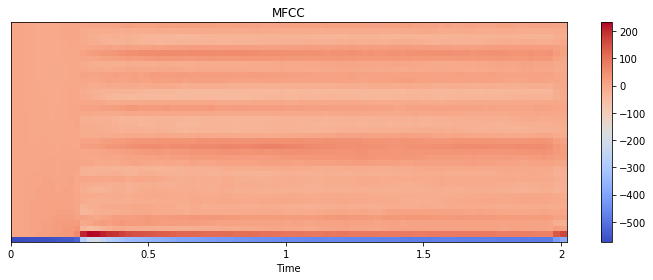

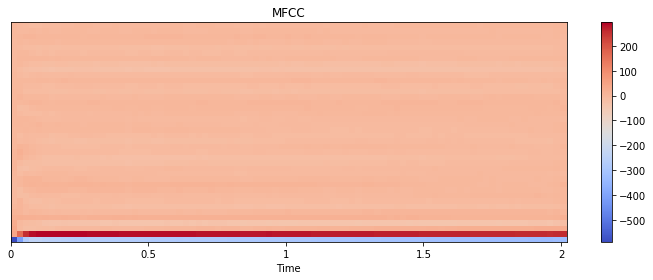

In [83]:
y, sr = librosa.load("C:\\Users\\Rahul\\Desktop\\AI\\Audio\\Classifying music notes\\Data\B4\\piano_B4_resampled - Copy (8).wav",sr=None)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

y, sr = librosa.load("C:\\Users\\Rahul\\Desktop\\AI\\Audio\\Classifying music notes\\Data\C2\\piano_C2_resampled - Copy (3).wav",sr=None)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

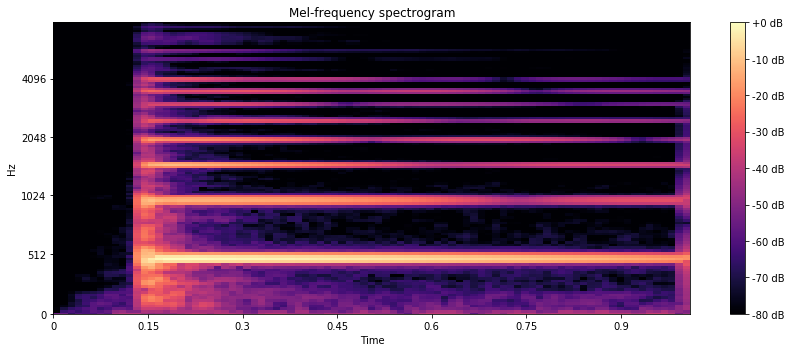

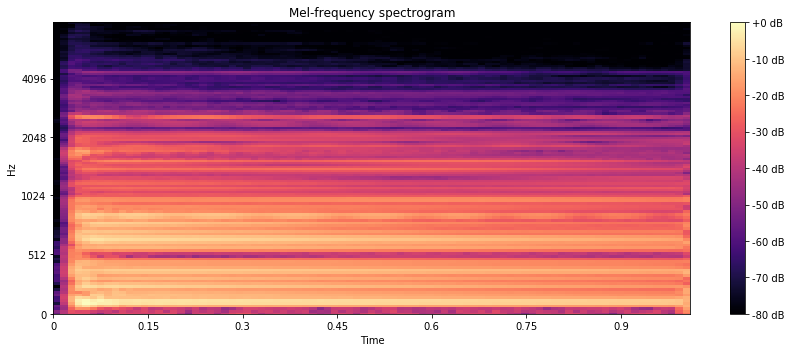

In [115]:
y, sr = librosa.load("C:\\Users\\Rahul\\Desktop\\AI\\Audio\\Classifying music notes\\Data\B4\\piano_B4_resampled - Copy (8).wav",sr=None)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,
fmax=8000)
plt.figure(figsize=(12, 5))
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, x_axis='time',
y_axis='mel', sr=sr,fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()
y, sr = librosa.load("C:\\Users\\Rahul\\Desktop\\AI\\Audio\\Classifying music notes\\Data\C2\\piano_C2_resampled - Copy (3).wav",sr=None)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,
fmax=8000)
plt.figure(figsize=(12, 5))
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, x_axis='time',
y_axis='mel', sr=sr,fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()

In [ ]:
y, sr = librosa.load("C:\\Users\\Rahul\\Desktop\\AI\\Audio\\Classifying music notes\\Data\B4\\piano_B4_resampled - Copy (8).wav",sr=None)
spec = np.abs(librosa.stft(y, hop_length=512))
plt.figure(figsize=(12, 6))
spec = librosa.amplitude_to_db(spec, ref=np.max)
librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.title('Spectrogram');
plt.show()

y, sr = librosa.load("C:\\Users\\Rahul\\Desktop\\AI\\Audio\\Classifying music notes\\Data\C2\\piano_C2_resampled - Copy (3).wav",sr=None)
spec = np.abs(librosa.stft(y, hop_length=512))
plt.figure(figsize=(12, 6))
spec = librosa.amplitude_to_db(spec, ref=np.max)
librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.title('Spetrogram');

plt.show()

In [84]:
def extract_features(file_name):
   
    try:
        audio, sample_rate = librosa.load(file_name, sr=None) 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)
    except Exception as e:
        print(e)
        return None 
     
    return mfccsscaled

In [85]:
data = "C:\\Users\\Rahul\\Desktop\\AI\\Audio\\Classifying music notes\\Data"
global features, feature
features = []
for note in os.listdir(data):
    files_of_each_note = os.listdir(os.path.abspath(os.path.join(data,note)))
    for file in files_of_each_note:
        file_name= os.path.abspath(os.path.join(data,note,file))
        file_name= file_name.replace('\\','\\\\')
        feature = extract_features(file_name)
        features.append([feature,note])

In [86]:
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

In [87]:
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())

In [88]:
print(X[0].shape)

(40,)


In [89]:
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))

In [90]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 42)

In [91]:
x_train[0].shape

(40,)

In [96]:
num_labels = yy.shape[1]
filter_size = 2

model = Sequential()
input_shape=(96,40)

model.add(Conv2D(1, (2,2), activation='relu',padding='same', input_shape=(40,1)))
model.add(Conv1D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv1D(48, (5, 5), padding="valid"))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv1D(48, (5, 5), padding="valid"))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dropout(rate=0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(10))
model.add(Activation('softmax'))

ValueError: Input 0 of layer conv2d_12 is incompatible with the layer: expected ndim=4, found ndim=3. Full shape received: [None, 40, 1]

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
model.summary()
score = model.evaluate(x_test, y_test, verbose=0)
print(score)

In [ ]:
num_epochs = 100
num_batch_size = 32
checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_mlp.hdf5', 
                               verbose=1, save_best_only=True)
model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)